## Data Mining Assignment#03

---------------------------------------------------------------------------------------------------------------------------------

- Name: Hammad Javaid
- Roll-number: i21-1661
- Section: DS-M

---------------------------------------------------------------------------------------------------------------------------------

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r"C:\Users\HAMMAD\Data\Q2 Dataset\dataset.csv", header=None)

#### Check data types of the columns and convert to floats 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 13.3 MB


In [4]:
print(df.dtypes)

0       int64
1       int64
2       int64
3       int64
4       int64
        ...  
1019    int64
1020    int64
1021    int64
1022    int64
1023    int64
Length: 1024, dtype: object


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,41.809412,44.471765,46.365294,48.824706,51.512353,55.007059,58.724706,63.082941,67.486471,70.138824,...,48.302941,48.269412,47.469412,47.110588,47.684118,47.203529,50.088235,49.534706,51.298824,49.830588
std,36.996319,38.492225,38.988326,39.259117,39.839900,40.746766,41.493422,43.680304,45.988730,46.636076,...,53.037833,56.734145,56.760981,53.464346,56.128968,56.391695,62.234310,62.328172,63.896382,65.920624
min,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000
25%,12.000000,13.000000,13.000000,15.000000,16.750000,19.000000,21.000000,23.000000,25.000000,27.000000,...,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,29.000000,33.000000,35.000000,41.000000,44.000000,50.000000,53.000000,58.000000,62.000000,65.000000,...,24.500000,22.000000,22.000000,23.500000,22.000000,22.000000,22.500000,23.000000,23.000000,19.000000
75%,61.000000,66.000000,69.000000,71.000000,75.000000,79.000000,85.000000,92.000000,97.000000,101.000000,...,72.000000,70.000000,66.250000,68.000000,66.000000,64.000000,65.000000,61.000000,65.000000,65.000000
max,214.000000,216.000000,215.000000,219.000000,219.000000,221.000000,219.000000,221.000000,223.000000,230.000000,...,255.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [21]:
def visualize_image(row):
    image = row.values.reshape(32, 32)
    plt.imshow(image, cmap='gray')
    plt.show()

---------------------------------------------------------------------------------------------------------------------------------

### Data Preprocessing

---------------------------------------------------------------------------------------------------------------------------------

In [7]:
if df.dtypes[0] != 'float':
    df = df.astype(float)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,35.0,45.0,45.0,48.0,50.0,52.0,54.0,60.0,61.0,65.0,...,7.0,6.0,7.0,6.0,6.0,8.0,8.0,9.0,9.0,9.0
1,13.0,12.0,11.0,13.0,11.0,12.0,11.0,12.0,16.0,22.0,...,47.0,68.0,74.0,64.0,71.0,72.0,72.0,67.0,62.0,58.0
2,12.0,15.0,20.0,24.0,27.0,30.0,42.0,48.0,49.0,57.0,...,6.0,6.0,12.0,17.0,15.0,10.0,9.0,9.0,8.0,7.0
3,9.0,8.0,7.0,7.0,8.0,9.0,15.0,19.0,29.0,34.0,...,123.0,54.0,10.0,10.0,10.0,7.0,6.0,7.0,7.0,18.0
4,114.0,112.0,112.0,112.0,112.0,108.0,116.0,118.0,118.0,115.0,...,65.0,62.0,59.0,53.0,49.0,44.0,37.0,36.0,37.0,42.0


In [9]:
df_dtypes = df.dtypes
df_dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
1019    float64
1020    float64
1021    float64
1022    float64
1023    float64
Length: 1024, dtype: object

In [14]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


#### Normalize the dataframe

In [10]:
def normalize_rows(df):
    # calculating L2 norm for each row
    norms = np.linalg.norm(df, axis=1)
    # replace any zero norms with 1 (to avoid division by zero)
    norms[norms == 0] = 1
    # divide each row by its norm (using broadcasting)
    normalized_df = df.div(norms, axis=0)
    return normalized_df

In [11]:
normalized_df = normalize_rows(df)

In [12]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.004359,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605,0.005605
1,0.006237,0.005757,0.005277,0.006237,0.005277,0.005757,0.005277,0.005757,0.007676,0.010555,...,0.022549,0.032623,0.035502,0.030704,0.034063,0.034542,0.034542,0.032144,0.029745,0.027826
2,0.007085,0.008856,0.011808,0.014169,0.015941,0.017712,0.024796,0.028339,0.028929,0.033652,...,0.003542,0.003542,0.007085,0.010037,0.008856,0.005904,0.005314,0.005314,0.004723,0.004133
3,0.004458,0.003962,0.003467,0.003467,0.003962,0.004458,0.007430,0.009411,0.014364,0.016841,...,0.060923,0.026747,0.004953,0.004953,0.004953,0.003467,0.002972,0.003467,0.003467,0.008916
4,0.044881,0.044093,0.044093,0.044093,0.044093,0.042518,0.045668,0.046455,0.046455,0.045274,...,0.025590,0.024409,0.023228,0.020866,0.019291,0.017322,0.014567,0.014173,0.014567,0.016535


#### Visualizing normalized images

In [59]:
random_indices = np.random.choice(normalized_df.index, 2, replace=False)

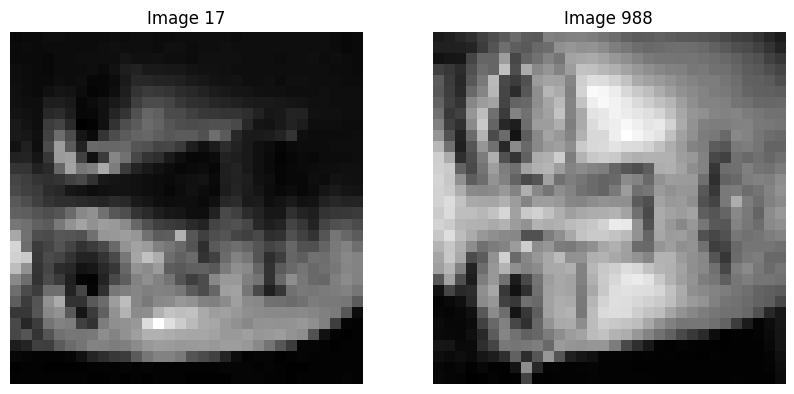

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, idx in enumerate(random_indices):
    image = normalized_df.iloc[idx].values.reshape(32, 32)
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(f'Image {idx}')
    ax[i].axis('off')

plt.show()

In [ ]:
visualize_image(normalized_df.iloc[980])

### Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

In [22]:
s = 10
imgs_per_s = 170
train_imgs_per_s = 150
training_data = []
testing_data = []
training_labels = []
testing_labels = []

In [24]:
for i in range(s):
    start = i * imgs_per_s
    end = start + imgs_per_s
    subject_data = normalized_df.iloc[start:end]
    
    # split
    train_data, test_data = train_test_split(subject_data, test_size=20, train_size=150, random_state=42)
    training_data.append(train_data)
    testing_data.append(test_data)
    # labels for the subject
    training_labels.extend([i] * train_imgs_per_s)
    testing_labels.extend([i] * (imgs_per_s - train_imgs_per_s))

In [25]:
# concat lists into dfs
training_data = pd.concat(training_data).reset_index(drop=True)
testing_data = pd.concat(testing_data).reset_index(drop=True)
# Convert labels lists to NP arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [26]:
(training_data.shape)

(1500, 1024)

In [27]:
(testing_data.shape)

(200, 1024)

In [28]:
(training_labels.shape)

(1500,)

In [29]:
(testing_labels.shape)

(200,)

#### Defiining the distance functions

In [32]:
# ( (x2-x1)^2 - (y2-y1)^2 )^1/2 -- euclidean distance
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

In [33]:
# 1 - (A . B / ||A||*||B||) -- Cosine distance
def cosine_distance(v1, v2):
    """ The cosine distance is defined as 1 - cosine_similarity. """
    dot_product = np.dot(v1, v2)
    norm_vector1 = np.linalg.norm(v1)
    norm_vector2 = np.linalg.norm(v2)
    # Avoid division by zero
    if norm_vector1 == 0 or norm_vector2 == 0:
        return 1.0  # Maximally dissimilar for cosine distance
        
    cosine_similarity = dot_product / (norm_vector1 * norm_vector2)
    
    return 1 - cosine_similarity

#### Testing on random df data-points

In [34]:
index1, index2 = np.random.choice(training_data.index, 2, replace=False)

vector1 = training_data.iloc[index1].values
vector2 = training_data.iloc[index2].values

In [35]:
(index1, index2)

(1201, 1355)

In [36]:
euclidean_dist_test = euclidean_distance(vector1, vector2)
cosine_dist_test = cosine_distance(vector1, vector2)

(euclidean_dist_test, cosine_dist_test)

(1.0481661285886723, 0.5493261165602825)

---------------------------------------------------------------------------------------------------------------------------------

### Applying K-NN

---------------------------------------------------------------------------------------------------------------------------------

In [37]:
from collections import Counter
from sklearn.metrics import accuracy_score

In [38]:
def k_nearest_neighbors(training_data, training_labels, test_instance, k, distance_func):
    distances = []
    # distance from the test instance to all training data
    for index, train_instance in training_data.iterrows():
        dist = distance_func(train_instance.values, test_instance)
        distances.append((train_instance, dist, training_labels[index]))
    
    # sort by distance and return the k nearest neighbors
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [39]:
def predict_classification(neighbors):
    votes = Counter([label for _, _, label in neighbors])
    return votes.most_common(1)[0][0]


In [40]:
def k_nn_test(training_data, training_labels, testing_data, testing_labels, k_values, distance_func):
    predictions = {}
    accuracies = {}
    
    for k in k_values:
        predictions[k] = []
        # Predict the label for each test instance and record the prediction
        for index, test_instance in testing_data.iterrows():
            neighbors = k_nearest_neighbors(training_data, training_labels, test_instance, k, distance_func)
            predicted_label = predict_classification(neighbors)
            predictions[k].append(predicted_label)
        
        accuracies[k] = accuracy_score(testing_labels, predictions[k])
    return accuracies

In [41]:
k_values = [2, 5, 7, 11]

#### Testing with Euclidean distance

In [42]:
euclidean_accuracies = k_nn_test(training_data, training_labels, testing_data, testing_labels, k_values, euclidean_distance)
print('Euclidean distance accuracies:', euclidean_accuracies)

Euclidean distance accuracies: {2: 1.0, 5: 0.985, 7: 0.965, 11: 0.955}


#### Testing with Cosine distance

In [43]:
cosine_accuracies = k_nn_test(training_data, training_labels, testing_data, testing_labels, k_values, cosine_distance)
print('Cosine distance accuracies:', cosine_accuracies)

Cosine distance accuracies: {2: 1.0, 5: 0.985, 7: 0.965, 11: 0.955}


In [44]:
rtable = pd.DataFrame({
    'k': k_values,
    'Euclidean Accuracy': [euclidean_accuracies[k] for k in k_values],
    'Cosine Accuracy': [cosine_accuracies[k] for k in k_values]
})

In [45]:
print(rtable)

    k  Euclidean Accuracy  Cosine Accuracy
0   2               1.000            1.000
1   5               0.985            0.985
2   7               0.965            0.965
3  11               0.955            0.955


In [46]:
results_df = pd.DataFrame(rtable)

In [47]:
results_df.head()

,k,Euclidean Accuracy,Cosine Accuracy
0,2,1.000,1.000
1,5,0.985,0.985
2,7,0.965,0.965
3,11,0.955,0.955


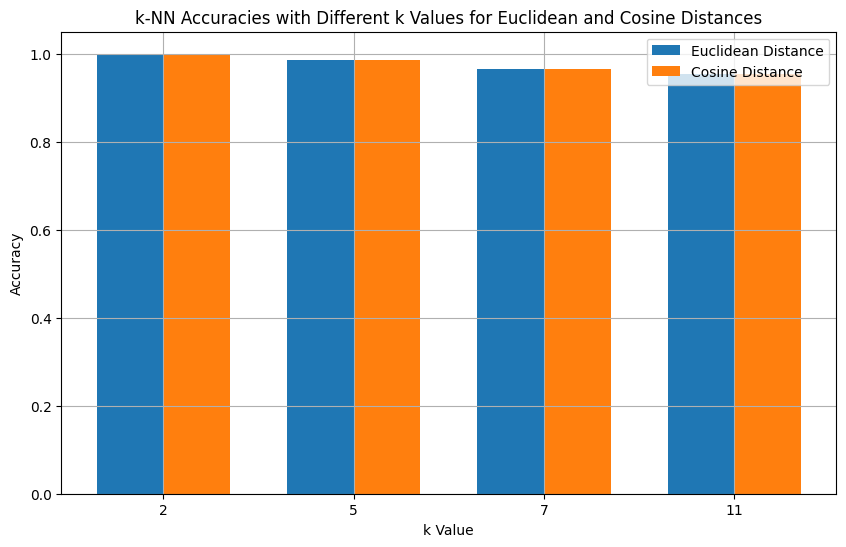

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
ind = np.arange(len(rtable['k']))

euclidean_bars = ax.bar(ind - width/2, rtable['Euclidean Accuracy'], width, label='Euclidean Distance')
cosine_bars = ax.bar(ind + width/2, rtable['Cosine Accuracy'], width, label='Cosine Distance')

ax.set_xlabel('k Value')
ax.set_ylabel('Accuracy')
ax.set_title('k-NN Accuracies with Different k Values for Euclidean and Cosine Distances')
ax.set_xticks(ind)
ax.set_xticklabels(rtable['k'])
ax.legend()

plt.grid(True)
plt.show()

### Evaluation with fewer training images

In [51]:
Ltrain_imgs = 100
Ltest_imgs = []
Ltrain_data = []
Ltrain_labels = []
Ltest_labels = []

for i in range(s):
    start = i * imgs_per_s
    end = start + imgs_per_s
    subject_data = normalized_df.iloc[start:end]
    
    # Adjusted split
    train_data_adj, test_data_adj = train_test_split(subject_data, test_size=20, train_size=Ltrain_imgs, random_state=42)
    Ltrain_data.append(train_data_adj)
    Ltest_imgs.append(test_data_adj)
    Ltrain_labels.extend([i] * Ltrain_imgs)
    Ltest_labels.extend([i] * (imgs_per_s - Ltrain_imgs))

In [52]:
# Recombine adjusted training and testing sets and labels
Ltrain_data = pd.concat(Ltrain_data).reset_index(drop=True)
Ltest_imgs = pd.concat(Ltest_imgs).reset_index(drop=True)
Ltrain_labels = np.array(Ltrain_labels)
Ltest_labels = np.array(Ltest_labels)

In [56]:
Leuclidean_accuracies = k_nn_test(training_data, training_labels, testing_data, testing_labels, k_values, euclidean_distance)
print('Euclidean distance accuracies with fewer training images:', Leuclidean_accuracies)

Euclidean distance accuracies with fewer training images: {2: 1.0, 5: 0.985, 7: 0.965, 11: 0.955}


In [57]:
Lcosine_accuracies = k_nn_test(training_data, training_labels, testing_data, testing_labels, k_values, cosine_distance)
print('Cosine distance accuracies with fewer training images:', Lcosine_accuracies)

Cosine distance accuracies with fewer training images: {2: 1.0, 5: 0.985, 7: 0.965, 11: 0.955}


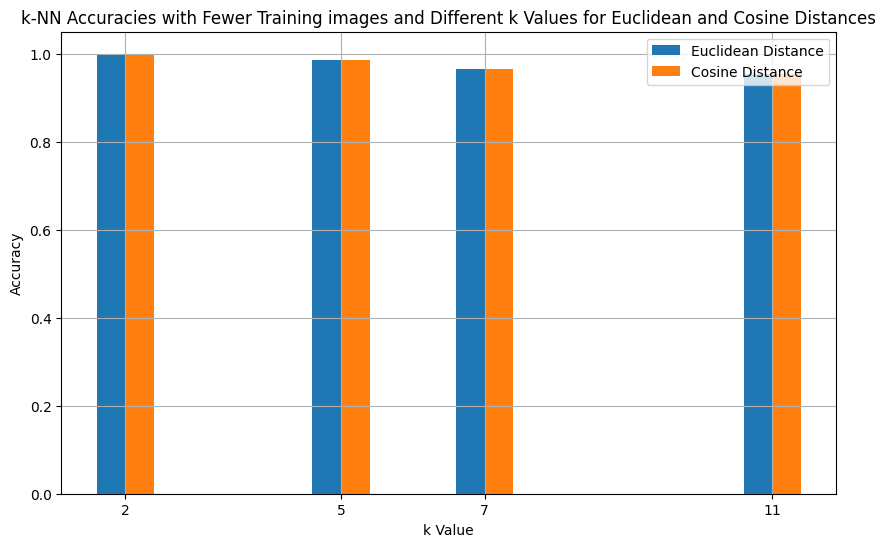

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(np.array(k_values) - 0.2, [Leuclidean_accuracies[k] for k in k_values], 0.4, label='Euclidean Distance')
plt.bar(np.array(k_values) + 0.2, [Lcosine_accuracies[k] for k in k_values], 0.4, label='Cosine Distance')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracies with Fewer Training images and Different k Values for Euclidean and Cosine Distances')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

##### same results with fewer training images :)

---------------------------------------------------------------------------------------------------------------------------------

### SVM & Gaussian Naive Bayes Classifier

---------------------------------------------------------------------------------------------------------------------------------

In [61]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [62]:
def train_svm_classifier(training_data, training_labels):
    # SVM classifier
    svm_clf = SVC(gamma='auto')  # 'auto' uses 1/n_features
    # train classifiera
    svm_clf.fit(training_data, training_labels)
    return svm_clf

In [63]:
def train_gaussian_nb_classifier(training_data, training_labels):
    # GaussianNB classifier
    gnb_clf = GaussianNB()
    # train classifier
    gnb_clf.fit(training_data, training_labels)
    return gnb_clf

#### Training & evaluating SVM

In [64]:
svm_clf = train_svm_classifier(training_data, training_labels)
svm_predictions = svm_clf.predict(testing_data)
svm_accuracy = accuracy_score(testing_labels, svm_predictions)
print('SVM Accuracy:', svm_accuracy)

SVM Accuracy: 0.635


#### Training & evaluating GaussianNB

In [65]:
gnb_clf = train_gaussian_nb_classifier(training_data, training_labels)
gnb_predictions = gnb_clf.predict(testing_data)
gnb_accuracy = accuracy_score(testing_labels, gnb_predictions)
print('GaussianNB Accuracy:', gnb_accuracy)

GaussianNB Accuracy: 0.85


##### i have the k-NN accuracies in a dictionary: 'euclidean_accuracies' and 'cosine_accuracies' so using best k from those results

In [66]:
best_k_euclidean = max(euclidean_accuracies, key=euclidean_accuracies.get)
best_k_cosine = max(cosine_accuracies, key=cosine_accuracies.get)

#### comparing accuracies

In [67]:
print(f"Best k-NN Accuracy with Euclidean distance (k={best_k_euclidean}): {euclidean_accuracies[best_k_euclidean]}")
print(f"Best k-NN Accuracy with Cosine distance (k={best_k_cosine}): {cosine_accuracies[best_k_cosine]}")
print('SVM Accuracy:', svm_accuracy)
print('GaussianNB Accuracy:', gnb_accuracy)

Best k-NN Accuracy with Euclidean distance (k=2): 1.0
Best k-NN Accuracy with Cosine distance (k=2): 1.0
SVM Accuracy: 0.635
GaussianNB Accuracy: 0.85


#### Plotting accuracies

In [68]:
accuracies = {
    'SVM': svm_accuracy,
    'GaussianNB': gnb_accuracy,
    'k-NN (Euclidean)': euclidean_accuracies[best_k_euclidean],
    'k-NN (Cosine)': cosine_accuracies[best_k_cosine]
}

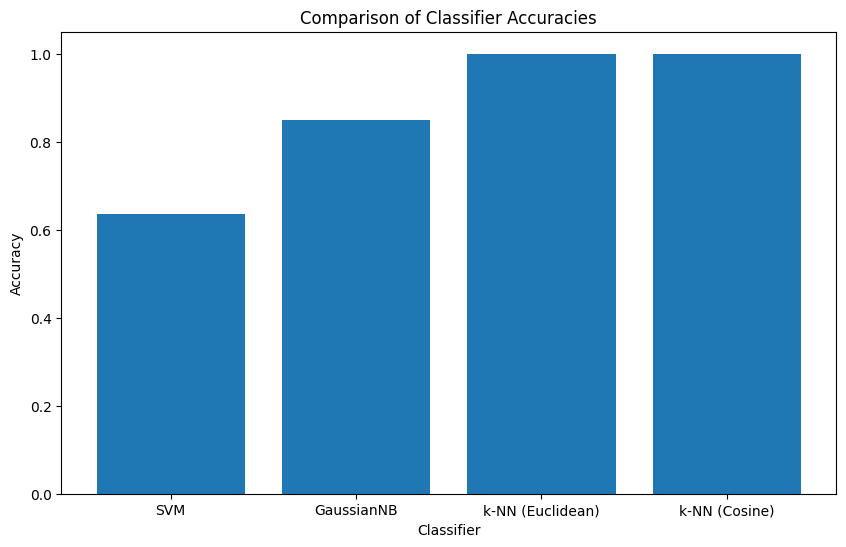

In [69]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.show()

#### Classification Report & Confusion Matrices for SVM & GuassianNB Classifiers

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [77]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_pred))
    
    return roc_auc_score(y_test_binarized, y_pred_binarized, average=average)

In [78]:
print('Classification Report for SVM:')
svm_classification_report = classification_report(testing_labels, svm_predictions)
print(svm_classification_report)

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       1.00      0.45      0.62        20
           2       0.69      0.45      0.55        20
           3       0.60      0.75      0.67        20
           4       0.61      0.55      0.58        20
           5       0.94      0.75      0.83        20
           6       0.71      0.60      0.65        20
           7       0.92      0.55      0.69        20
           8       0.24      0.65      0.35        20
           9       1.00      1.00      1.00        20

    accuracy                           0.64       200
   macro avg       0.75      0.64      0.66       200
weighted avg       0.75      0.64      0.66       200



In [79]:
print('Classification Report for GaussianNB:')
gnb_classification_report = classification_report(testing_labels, gnb_predictions)
print(gnb_classification_report)

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.89      0.85      0.87        20
           2       0.89      0.80      0.84        20
           3       0.94      0.80      0.86        20
           4       0.67      0.70      0.68        20
           5       0.94      0.80      0.86        20
           6       0.83      1.00      0.91        20
           7       1.00      0.90      0.95        20
           8       0.57      0.85      0.68        20
           9       1.00      1.00      1.00        20

    accuracy                           0.85       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.87      0.85      0.86       200



In [80]:
svm_roc_auc = multiclass_roc_auc_score(testing_labels, svm_predictions)
print('SVM ROC AUC:', svm_roc_auc)

SVM ROC AUC: 0.7972222222222222


In [81]:
gnb_roc_auc = multiclass_roc_auc_score(testing_labels, gnb_predictions)
print('GaussianNB ROC AUC:', gnb_roc_auc)

GaussianNB ROC AUC: 0.9166666666666667


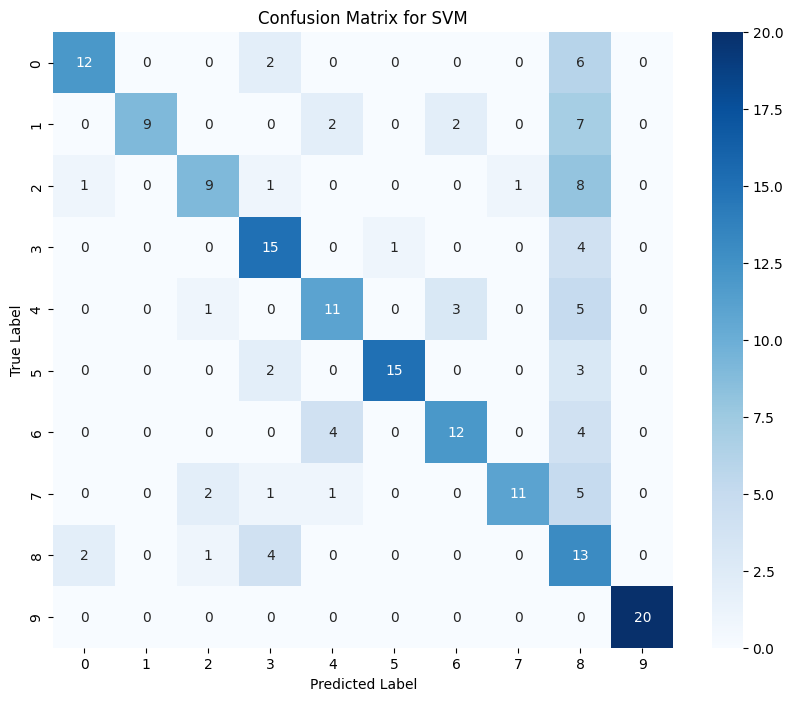

In [82]:
svm_conf_matrix = confusion_matrix(testing_labels, svm_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

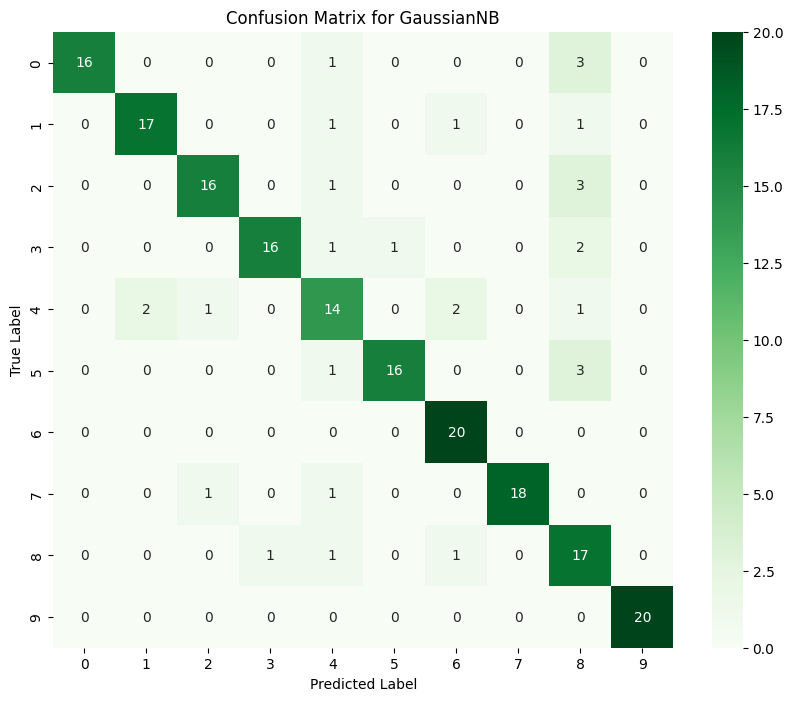

In [83]:
gnb_conf_matrix = confusion_matrix(testing_labels, gnb_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap="Greens")
plt.title('Confusion Matrix for GaussianNB')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

### PCA and visualization

---------------------------------------------------------------------------------------------------------------------------------

In [70]:
from sklearn.decomposition import PCA

In [71]:
# reducing dimensionality to 3 components
pca = PCA(n_components=3)
pca.fit(training_data)  # Fiting PCA on training data

PCA(n_components=3)

In [72]:
print(f"Variance explained by the 3 principal components: {pca.explained_variance_ratio_}")

Variance explained by the 3 principal components: [0.43467785 0.12408677 0.07505365]


In [44]:
training_data_pca = pca.transform(training_data)
testing_data_pca = pca.transform(testing_data)

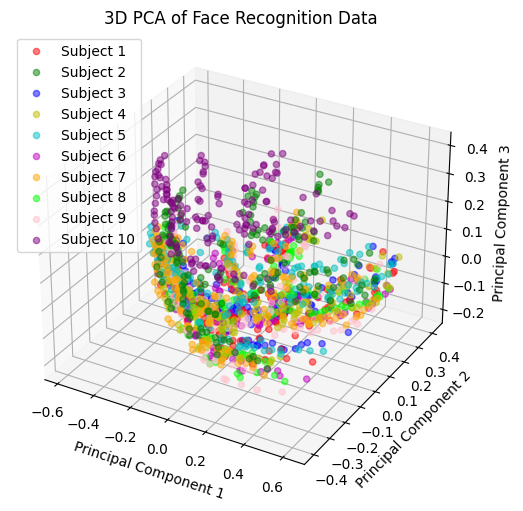

In [45]:
# Visualizing the transformed data in 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color map for each class
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'lime', 'pink', 'purple']

for i in range(subjects):
    ax.scatter(training_data_pca[training_labels == i, 0],  # x-axis
               training_data_pca[training_labels == i, 1],  # y-axis
               training_data_pca[training_labels == i, 2],  # z-axis
               c=colors[i],
               label=f'Subject {i+1}',
               alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Face Recognition Data')

ax.legend()
plt.show()

### There appears to be some degree of overlap among different subjects, indicated by the intermingling colors. This suggests that the PCA has captured some features that are common across different subjects, which may be inherent similarities in facial structures or poses.

### Despite the overlap, we can observe regions (lower-right) where certain colors (representing subjects) cluster more densely, indicating that PCA has managed to find some patterns or features unique to those subjects.

#### Class separation retention by PCA:

- PCA has partially retained class separation as there are visible clusters for some subjects. However, the overlap of colors shows that the separation is not perfect.
- The effectiveness of PCA in this case seems to depend on the variance each principal component holds.
- The plot shows that while PCA has reduced the dimensions with some preservation of the class structure, a classifier may still confuse between subjects due to the overlap.

---------------------------------------------------------------------------------------------------------------------------------